Продакт-менеджер Василий попросил вас проанализировать совершенные покупки и ответить на следующие вопросы:
1. Сколько у нас пользователей, которые совершили покупку только один раз?
2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?
3. По каждому товару определить, в какой день недели товар чаще всего покупается.
4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.
5. Напиши функцию на python, позволяющую строить когортный анализ. В период с января по декабрь выяви когорту с самым высоким retention на 3-й месяц. 
6. Построй RFM-кластеры для пользователей. Выведи для каждого кластера средние значения метрик R, F, M (и опиши подробно, как были построены метрики R, F, M). 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# читаем данные, даты сразу спарсим в формат datetime
df_orders_dataset = pd.read_csv('/home/jupyter-l-petrova/Project e-commerce/olist_orders_dataset.csv', parse_dates=['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'])

In [4]:
df_orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [5]:
# посмотрим тип данных в df_orders_dataset
df_orders_dataset.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [6]:
# посмотрим кол-во строк и столбцов
df_orders_dataset.shape

(99441, 8)

In [7]:
# считаем данные по customers_dataset 
df_customers_dataset = pd.read_csv('/home/jupyter-l-petrova/Project e-commerce/olist_customers_dataset.csv')

In [8]:
df_customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [9]:
# посмотрим кол-во строк и столбцов
df_customers_dataset.shape

(99441, 5)

In [10]:
# считаем данные по order_items
df_order_items = pd.read_csv('/home/jupyter-l-petrova/Project e-commerce/olist_order_items_dataset.csv', parse_dates=['shipping_limit_date'])

In [11]:
df_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [12]:
# посмотрим кол-во строк и столбцов
df_order_items.shape

(112650, 7)

In [13]:
# объединяем 2 таблицы с данными по пользователям и заказам по столбцу customer_id
df_cust_orders = df_orders_dataset.merge(df_customers_dataset, on='customer_id', how='inner')

In [14]:
df_cust_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [15]:
# кол-во пропущенных значений в столбцах
df_cust_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

In [21]:
# Посмотрим есть ли дубликаты строк в датафрейме
df_cust_orders.duplicated().sum()

0

# 1. Сколько у нас пользователей, которые совершили покупку только один раз?

In [24]:
# делаем группировку по customer_unique_id,которые совершили покупку один раз, считаем их количество, применяем метод nunique()
# в данном случае совершение покупки считаю по уникальному идентификатору заказа (номер чека) order_id
df_count_customer_unique_id = df_cust_orders.groupby('customer_unique_id', as_index=False) \
                                            .agg({'order_id':'count'}) \
                                            .query('order_id == "1"') \
                                            .nunique()

In [25]:
df_count_customer_unique_id

customer_unique_id    93099
order_id                  1
dtype: int64

## Ответ: 93099

# 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

In [26]:
# Смотрим order_status=delivered, все, что НЕ delivered буду считать недоставленным до пользователя. кол-во строк 96478

In [27]:
df_cust_orders.query('order_status == "delivered"')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [28]:
# отбираю недоставленные заказы
df_cust_orders_not_delivered = df_cust_orders.loc[df_cust_orders['order_status'] != 'delivered']
df_cust_orders_not_delivered
# всего недоставленных заказов 2963

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,08fb46d35bb3ab4037202c23592d1259,13215,jundiai,SP
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21,c7f8d7b1fffc946d7069574f74c39f4e,88140,santo amaro da imperatriz,SC
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03,9f269af9c49244f6ba4a46985a3cfc2e,3436,sao paulo,SP
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07,528b011eb7fab3d59c336cc7248eed3a,38600,paracatu,MG
...,...,...,...,...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01,e90598185d2427a35e32ef241a5c04aa,11075,santos,SP
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06,965191786b70912f793e4a777fd623cd,13050,campinas,SP
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27,d05c44a138277ad325d915c6b7ccbcdf,5344,sao paulo,SP
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15,e72a90a2b29fe1a8795b284aaaa3246f,22723,rio de janeiro,RJ


In [29]:
# делаю проверку по количеству строк
96478+2963

99441

In [30]:
# по времени доставки заказа 2963-2957=6 заказов имеют пустую (?) ячейку, но этот момент в дальнейших расчетах я не учитываю
df_cust_orders_not_delivered.order_delivered_customer_date.isna().sum()

2957

In [31]:
# попыталась вынести через loc, не получилось, поэтому так оставляю.
# df_not_deliv_order_delivered_customer_date = df_cust_orders_not_delivered.loc[df_cust_orders_not_delivered['order_delivered_customer_date'] != 'NaT']

In [32]:
# далее добавляю столбец month по обещанной дате доставки товара
df_cust_orders_not_delivered['month']=df_cust_orders_not_delivered['order_estimated_delivery_date'].dt.month

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
# вывожу в какой месяц не были доставлены заказы исходя из обещанной даты доставки
df_cust_orders_not_delivered['order_estimated_delivery_date'].dt.month

6         5
44        6
103       8
128      10
154       2
         ..
99283    10
99313     2
99347     9
99348     9
99415    10
Name: order_estimated_delivery_date, Length: 2963, dtype: int64

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

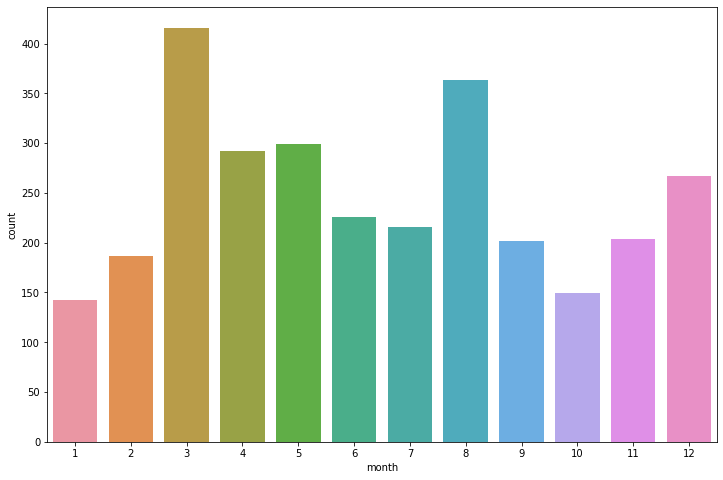

In [34]:
# формирую график недоставленных заказов по месяцам
plt.figure(figsize=(12, 8))
sns.countplot(df_cust_orders_not_delivered.month)
sns.despine

In [35]:
# для подробной картины группирую по месяцам количество недоставленных заказов
df_cust_orders_not_delivered.groupby('month') \
                            .agg({'order_id':'count'})

,order_id
month,
1,142
2,187
3,416
4,292
5,299
6,226
7,216
8,363
9,202


In [36]:
# для просмотра детализации по недоставленным заказам по месяцам использую query, и таким образом можно пройтись по всем месяцам
df_cust_orders_not_delivered.query('month == "1"')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,month
3459,2f30c0b1905c65a8ff6c6358bc909625,e963d0e4f815dcd28b135d7d340ec51a,unavailable,2017-12-08 09:32:48,2017-12-09 13:30:49,NaT,NaT,2018-01-03,215e0a9044344dca7820b462c60bd206,14010,ribeirao preto,SP,1
3466,e2beeb3a428f811804079bc11b23c0c0,31665bd5bc542687ab54c9fd9ed9917b,processing,2017-12-28 12:46:11,2017-12-28 12:54:49,NaT,NaT,2018-01-24,afbe9434938af234d7169a2afd77dfdb,25025,duque de caxias,RJ,1
4089,1ff6183537eb3a189de77b309ed28ad1,52ac1d5c2063338b5a45f69a14528c9b,unavailable,2018-01-02 17:31:02,2018-01-04 11:57:21,NaT,NaT,2018-01-31,93345700f0e852aa904fae18cec8437c,26087,nova iguacu,RJ,1
4153,96d3f09ebc42f05ab83a2ca85483e0b6,a0abb996d53cdd579f6af5bc5de8c28b,shipped,2017-12-13 23:04:15,2017-12-13 23:12:21,2017-12-18 10:43:46,NaT,2018-01-10,ceed36e28a7cafdb8933348019f37b28,22621,rio de janeiro,RJ,1
5942,511d690ed216be4320cc7ad3174a2292,106f3a5c822e52bc9578d692032ad772,shipped,2017-12-14 11:51:34,2017-12-15 15:35:20,2017-12-18 18:21:52,NaT,2018-01-09,e3ddd5173292d5aa03388d33b74181bc,20910,rio de janeiro,RJ,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96087,265271dd979e1221bab55d039af24b37,fc748b54d0a4e82922a48d9d79529189,processing,2017-12-15 10:43:11,2017-12-15 10:55:17,NaT,NaT,2018-01-10,30850486f5c7e7cf026daf8b81e40dcb,3386,sao paulo,SP,1
96623,e5d3a9fd67a092461d0a4e3feb145fb5,dcca41a026a2c9326ed70adf39220274,processing,2017-12-24 13:33:13,2017-12-27 04:07:00,NaT,NaT,2018-01-19,5fd4bfd3fe98adf62ac641f0459dc961,6852,itapecerica da serra,SP,1
98392,f73c0c32115b0bbfd5769c0cf67fb1c7,6466a7006594fde33f3ac032585147bd,shipped,2018-01-08 23:35:29,2018-01-08 23:47:37,2018-01-09 20:37:41,NaT,2018-01-24,3fd04a79bdf442099c2a9556daad3735,11090,santos,SP,1
99140,aea0db338150b526dde24f6fd953a5ed,379a02efdc6a56bd27f99b95fc2f6c06,processing,2017-12-26 21:56:13,2017-12-26 22:05:26,NaT,NaT,2018-01-26,43fb4e33ebe4ac765e99c7b57e5d6940,79200,aquidauana,MS,1


# 3. По каждому товару определить, в какой день недели товар чаще всего покупается

In [37]:
# соединим дф с данными о товаре и df_cust_orders

In [38]:
df_product = df_cust_orders.merge(df_order_items, on='order_id', how='inner')
df_product

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [39]:
# по времени подтверждения оплаты заказа order_approved_at определим дни недели, когда за товар оплачивают, соответственно, 
# покупают его.

In [40]:
# добавим в дф столбец weekday
df_product['weekday']=df_product['order_approved_at'].dt.strftime('%A')

In [41]:
df_product.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,weekday
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,Thursday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,Tuesday


In [42]:
# группируем количество заказов по дням недели
df_product.groupby('weekday') \
                .agg({'product_id':'count'}) \
                .sort_values(by=['product_id'])

,product_id
weekday,
Sunday,10057
Saturday,13839
Monday,14667
Friday,16719
Thursday,17706
Wednesday,17865
Tuesday,21782


In [43]:
# df.orderDTE.apply(lambda x: x.strftime(‘%Y-%m’))

# 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов) 

In [38]:
# также пользуемся дф df_product и считаем за покупки оплаченные товары.

In [39]:
# добавляем новые столбцы month и Year_month
df_product['month']=df_product['order_approved_at'].dt.month
df_product['Year_month']=df_product['order_approved_at'].dt.strftime('%Y-%m')
df_product.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,weekday,month,Year_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,Monday,10.0,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,Thursday,7.0,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,Wednesday,8.0,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,Saturday,11.0,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,Tuesday,2.0,2018-02


In [40]:
# группируем количество заказов по столбцу год-месяц,считаем среднее кол-во по order_item_id —  идентификатор товара внутри одного заказа
df_3 = df_product.groupby(['customer_unique_id', 'Year_month','month'], as_index=False) \
                    .agg({'order_item_id':'mean'}) \
                    .sort_values(by=['Year_month'])
                        

In [41]:
df_3

,customer_unique_id,Year_month,month,order_item_id
49933,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09,9.0,2.0
53857,8de8484141a728d73763be267b73cda2,2016-10,10.0,1.0
2356,0636d30c77f0f9cfad81f1c9b58c791f,2016-10,10.0,1.0
90849,eec95eabca2b8d033e1d36ad86ad688a,2016-10,10.0,1.0
13936,247c8264f852b34cd3124aec69332a9e,2016-10,10.0,1.0
...,...,...,...,...
89197,ea6c32cd21c1105cbdc3a6e10c14a75f,2018-08,8.0,1.0
78237,cd8e98ddbf3688617091fdeef6f8025a,2018-08,8.0,1.0
32298,54d2bd42904dd16e1c0486df0ce56854,2018-08,8.0,1.0
54093,8e8396c52591c16dc5337c7e9446d45e,2018-08,8.0,1.0


In [42]:
# далее я могу написать условие, что по если month = от 1 до 12, то order_item_id делю на 4, с рядом исключений, 
# например ноябрь 2021, через if-else, но выходит ошибка The truth value of a Series is ambiguous. Use a.empty, a.bool(), 
# a.item(), a.any() or a.all().
# Могу сделать через qurty путем отбора месяцев

In [43]:
# и так, в январе,марте,мае, июле,августе, октябре, декабре = 31 дней, 31/7=4.43 недель
# в феврале = 28 дней, 28/7=4 недель
# в апреле,июне,сентябе,ноябре=30 дней, 30/7=4,28 недель
df_3_28 = df_3.loc[df_3.month == 2.0]
df_3_28

,customer_unique_id,Year_month,month,order_item_id
77381,cb514ab3f0b2a8b0492c1f5c126ff614,2017-02,2.0,1.0
9197,17f61f10fb5d764846a962620c6f7bbc,2017-02,2.0,1.0
2603,06dd24ec7b04fc79c1702fe04b9a38a3,2017-02,2.0,1.0
52880,8b2b2f74f91382a716c4471728e1bdac,2017-02,2.0,1.5
77728,cc3a211cebe0b800145520aa1b44082a,2017-02,2.0,1.0
...,...,...,...,...
38462,64f30e1dd309856d47cba0089a338ddf,2018-02,2.0,1.0
86797,e3ff1c66fc29070a74179654e03caea3,2018-02,2.0,1.0
81364,d59540b8abcb7fda3d3006f0c824f393,2018-02,2.0,1.0
62343,a3da3b053d29f62917712f2b12c8f9ff,2018-02,2.0,1.0


In [44]:
# добавляю столбец со средним значением покупки в неделю
df_3_28['order_item_id_in_week'] = df_3_28.order_item_id/4
df_3_28.head()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,customer_unique_id,Year_month,month,order_item_id,order_item_id_in_week
77381,cb514ab3f0b2a8b0492c1f5c126ff614,2017-02,2.0,1.0,0.250
9197,17f61f10fb5d764846a962620c6f7bbc,2017-02,2.0,1.0,0.250
2603,06dd24ec7b04fc79c1702fe04b9a38a3,2017-02,2.0,1.0,0.250
52880,8b2b2f74f91382a716c4471728e1bdac,2017-02,2.0,1.5,0.375
77728,cc3a211cebe0b800145520aa1b44082a,2017-02,2.0,1.0,0.250


In [45]:
# в апреле,июне,сентябе,ноябре=30 дней, 30/7=4,28 недель
df_3_30 = df_3.query('month == "4.0" or month == "6.0" or month == "9.0" or month == "11.0"')
df_3_30

,customer_unique_id,Year_month,month,order_item_id
49933,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09,9.0,2.0
83383,db095fb465d1953805f0a25b1618de77,2017-04,4.0,1.0
14130,24fa0c2c6bb100ad4bc2b28c8e8f0ef5,2017-04,4.0,1.0
42320,6f1b9f60ea8ee748140353648c2d8d8f,2017-04,4.0,1.0
86789,e3fafe5c61833136c200fe441180c538,2017-04,4.0,1.0
...,...,...,...,...
52836,8b1116032c87632fb37d9c8918ae1b82,2018-06,6.0,1.0
81857,d70176238468bf3cb2b61a946b417707,2018-06,6.0,1.0
81679,d684009afd7d174712f30b1fe0bf0a9a,2018-06,6.0,1.0
3086,080afd32070de419f334fd7f7014fa0e,2018-06,6.0,1.0


In [46]:
df_3_30['order_item_id_in_week'] = df_3_30.order_item_id/4.28
df_3_30.head()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,customer_unique_id,Year_month,month,order_item_id,order_item_id_in_week
49933,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09,9.0,2.0,0.467290
83383,db095fb465d1953805f0a25b1618de77,2017-04,4.0,1.0,0.233645
14130,24fa0c2c6bb100ad4bc2b28c8e8f0ef5,2017-04,4.0,1.0,0.233645
42320,6f1b9f60ea8ee748140353648c2d8d8f,2017-04,4.0,1.0,0.233645
86789,e3fafe5c61833136c200fe441180c538,2017-04,4.0,1.0,0.233645


In [47]:
# и так, в январе,марте,мае, июле,августе, октябре, декабре = 31 дней,4.43 недель
df_3_31 = df_3.query('month == "1.0" or month == "3.0" or month == "5.0" or month == "7.0" or month == "8.0" or month == "10.0" or month == "12.0"')
df_3_31

,customer_unique_id,Year_month,month,order_item_id
53857,8de8484141a728d73763be267b73cda2,2016-10,10.0,1.0
2356,0636d30c77f0f9cfad81f1c9b58c791f,2016-10,10.0,1.0
90849,eec95eabca2b8d033e1d36ad86ad688a,2016-10,10.0,1.0
13936,247c8264f852b34cd3124aec69332a9e,2016-10,10.0,1.0
51526,87776adb449c551e74c13fc34f036105,2016-10,10.0,1.0
...,...,...,...,...
78239,cd915c60db8686f9a3dc35745aa1691c,2018-08,8.0,1.0
89197,ea6c32cd21c1105cbdc3a6e10c14a75f,2018-08,8.0,1.0
78237,cd8e98ddbf3688617091fdeef6f8025a,2018-08,8.0,1.0
32298,54d2bd42904dd16e1c0486df0ce56854,2018-08,8.0,1.0


In [48]:
df_3_31['order_item_id_in_week'] = df_3_31.order_item_id/4.43
df_3_31.head()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,customer_unique_id,Year_month,month,order_item_id,order_item_id_in_week
53857,8de8484141a728d73763be267b73cda2,2016-10,10.0,1.0,0.225734
2356,0636d30c77f0f9cfad81f1c9b58c791f,2016-10,10.0,1.0,0.225734
90849,eec95eabca2b8d033e1d36ad86ad688a,2016-10,10.0,1.0,0.225734
13936,247c8264f852b34cd3124aec69332a9e,2016-10,10.0,1.0,0.225734
51526,87776adb449c551e74c13fc34f036105,2016-10,10.0,1.0,0.225734


In [49]:
# отбираю например сентябрь, в сентябре 30 дней, это значит 30/7=4,28 недель
df_3_09 = df_3.loc[df_3.month == 9.0]
df_3_09['order_item_id_in_week'] = df_3.order_item_id/4.28
df_3_09
# и так повторяю по всем месяцам

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,customer_unique_id,Year_month,month,order_item_id,order_item_id_in_week
49933,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09,9.0,2.0,0.467290
79813,d1a460316c3d76c8470f6bd34412b70f,2017-09,9.0,1.0,0.233645
2065,0567f279c243671842613f581ed3462c,2017-09,9.0,1.0,0.233645
26646,45f6782e5cab8c938a06f6ae56f9d6c0,2017-09,9.0,1.0,0.233645
54765,903c88e94d60602827df5cbdd8b2c60f,2017-09,9.0,1.0,0.233645
...,...,...,...,...,...
96541,fdf584cb034b3e021e771a06df9be240,2017-09,9.0,1.0,0.233645
97111,ff81e8b0dc735986db35def560ba2bf2,2017-09,9.0,1.0,0.233645
92130,f23b862c391144dbb054efae4436e2e0,2017-09,9.0,1.0,0.233645
92727,f3d0fea0d8a92efd77eb11feaa53a151,2017-09,9.0,1.0,0.233645


In [50]:
df_1_09 = df_3.loc[df_3.month == 1.0]
# в январе 31 дней 31/7=4.43 недель


In [51]:
df_1_09['order_item_id_in_week'] = df_1_09.order_item_id/4.43
df_1_09

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,customer_unique_id,Year_month,month,order_item_id,order_item_id_in_week
40281,69b2b29382af03e03e486ad307a76000,2017-01,1.0,1.0,0.225734
72309,bdfe47b4aabb5f74902e1c197e18c549,2017-01,1.0,1.0,0.225734
40335,69e4074cb5368c1539397e4ea570757a,2017-01,1.0,1.0,0.225734
54981,90cdf84ae810487178762867e5b09fd3,2017-01,1.0,1.0,0.225734
9297,1842d12ff8f27b3e8a95f5a98a14dfb3,2017-01,1.0,1.0,0.225734
...,...,...,...,...,...
73267,c06c4cd7b04f7a00770b273e06452f6c,2018-01,1.0,1.0,0.225734
79048,cfc7eef674ef02c6f9d3ff2c7e1e8567,2018-01,1.0,1.5,0.338600
18982,31c6dd92c95904f1273cbf65758ee92e,2018-01,1.0,1.0,0.225734
94297,f7f030d7f63e03e2c07f1d856c91678a,2018-01,1.0,1.0,0.225734


In [52]:
# соединяем все три таблицы df_3_28, df_3_30, df_3_31
df_total = pd.concat([df_3_28, df_3_30, df_3_31])

In [53]:
df_total

,customer_unique_id,Year_month,month,order_item_id,order_item_id_in_week
77381,cb514ab3f0b2a8b0492c1f5c126ff614,2017-02,2.0,1.0,0.250000
9197,17f61f10fb5d764846a962620c6f7bbc,2017-02,2.0,1.0,0.250000
2603,06dd24ec7b04fc79c1702fe04b9a38a3,2017-02,2.0,1.0,0.250000
52880,8b2b2f74f91382a716c4471728e1bdac,2017-02,2.0,1.5,0.375000
77728,cc3a211cebe0b800145520aa1b44082a,2017-02,2.0,1.0,0.250000
...,...,...,...,...,...
78239,cd915c60db8686f9a3dc35745aa1691c,2018-08,8.0,1.0,0.225734
89197,ea6c32cd21c1105cbdc3a6e10c14a75f,2018-08,8.0,1.0,0.225734
78237,cd8e98ddbf3688617091fdeef6f8025a,2018-08,8.0,1.0,0.225734
32298,54d2bd42904dd16e1c0486df0ce56854,2018-08,8.0,1.0,0.225734


In [54]:
# Через shape убеждаемся что все данные на месте.
df_3.shape[0]

97301

In [55]:
df_total.shape[0]

97301

## Таким образом,выяснили, сколько у каждого из пользователей в среднем покупок в неделю (по месяцам).

# 5. Сделать когортный анализ. В период с января по декабрь выявить когорту с самым высоким retention на 3-й месяц.

In [56]:
# сегментирование по времени и месту
# функция, которая делит пользователей на сегменты, то есть сгруппировать пользователей по действию купили-не купили в такой-то месяц,

# должны выявить показатель удержания клиентов по уникальному идентификатору пользователя, т.е. отчет по пользователям, 
# которые совершили покупку более 1 раза 

In [57]:
df_cust_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [58]:
# рассчитываем совокупный показатель, показывающий, сколько заказов было размещено каждым клиентом.
n_orders = df_cust_orders.groupby(['customer_unique_id'])['order_purchase_timestamp'].nunique()
n_orders

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    1
0000b849f77a49e4a4ce2b2a4ca5be3f    1
0000f46a3911fa3c0805444483337064    1
0000f6ccb0745a6a4b88665a16c9f078    1
0004aac84e0df4da2b147fca70cf8255    1
                                   ..
fffcf5a5ff07b0908bd4e2dbc735a684    1
fffea47cd6d3cc0a88bd621562a9d061    1
ffff371b4d645b6ecea244b27531430a    1
ffff5962728ec6157033ef9805bacc48    1
ffffd2657e2aad2907e67c3e9daecbeb    1
Name: order_purchase_timestamp, Length: 96096, dtype: int64

In [59]:
mult_orders_perc = np.sum(n_orders > 1) / df_cust_orders['customer_unique_id'].nunique()
mult_orders_perc

0.028513153513153512

## всего лишь 2,8% пользователей возвращались и покупали вновь. Можно сказать, явного удержания нет. 

## Дополнительно смотрим на распределение количества заказов на одного клиента. Для этого мы можем повторно использовать ранее агрегированные данные ( n_orders) и нанести данные на гистограмму.

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


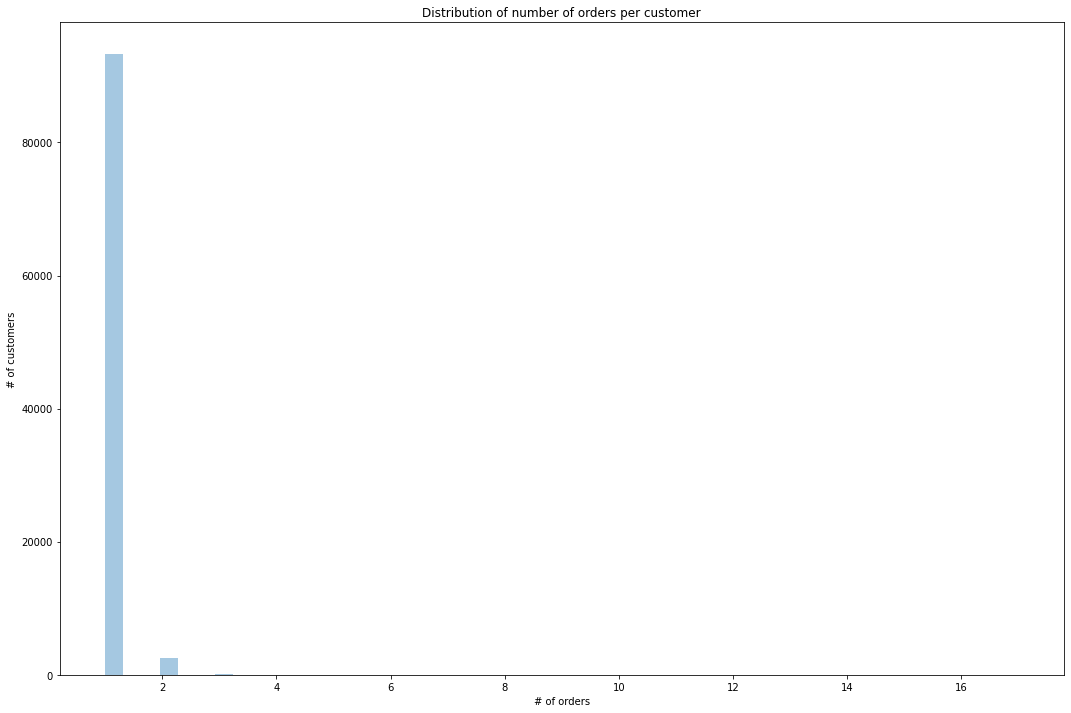

In [62]:
plt.figure(figsize=(18, 12))
ax = sns.distplot(n_orders, kde=False, hist=True)
ax.set(title='Distribution of number of orders per customer',
       xlabel='# of orders', 
       ylabel='# of customers');

In [63]:
# делаем вывод, в основном, пользователи делали покупки 1 раз.

In [64]:
# Когортный анализ
# Набор данных, который мы используем для этого примера, не содержит дату регистрации клиента — дату, когда он зарегистрировался 
# у продавца. Вот почему мы предполагаем, что когорта, к которой они принадлежат, основана на дате первой покупки.

In [65]:
# создаем переменные cohort и order_month Первый указывает месячную когорту на основе даты первой покупки (рассчитывается на 
# одного клиента). Последний - это усеченный месяц даты покупки.

In [66]:
df_cust_orders['order_month'] = df_cust_orders['order_purchase_timestamp'].dt.to_period('M')

In [67]:
df_cust_orders['cohort'] = df_cust_orders.groupby('customer_unique_id')['order_purchase_timestamp'] \
                 .transform('min') \
                 .dt.to_period('M') 

In [68]:
df_cust_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_month,cohort
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,2017-09
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02,2018-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,2017-03,2017-03
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,2018-02,2018-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,2017-08,2017-08
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2018-01,2018-01


In [69]:
df_cust_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_month                         0
cohort                              0
dtype: int64

In [70]:
# Затем мы агрегируем данные по cohort и order_month и подсчитываем количество уникальных клиентов в каждой группе. 
# Дополнительно добавляем period_number, указывающее количество периодов между месяцем когорты и месяцем покупки.

In [71]:
from operator import attrgetter

In [72]:
df_cohort = df_cust_orders.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('customer_unique_id', 'nunique')) \
              .reset_index(drop=False)
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))

In [73]:
# Следующим шагом является поворот df_cohort таблицы таким образом, чтобы каждая строка содержала информацию о данной когорте, 
# а каждый столбец содержал значения за определенный период.

In [74]:
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

In [75]:
# Чтобы получить матрицу удержания , нам нужно разделить значения каждой строки на первое значение строки, которое на самом деле 
# является размером когорты — все клиенты, которые сделали свою первую покупку в данном месяце.

In [76]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

In [77]:
# Наконец, мы наносим матрицу удержания в виде тепловой карты. Кроме того, мы хотели включить дополнительную информацию о размере 
# когорты. Вот почему мы фактически создали две тепловые карты, где одна, указывающая размер когорты, использует только белую 
# цветовую карту — без окраски вообще.

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from operator import attrgetter
import matplotlib.colors as mcolors

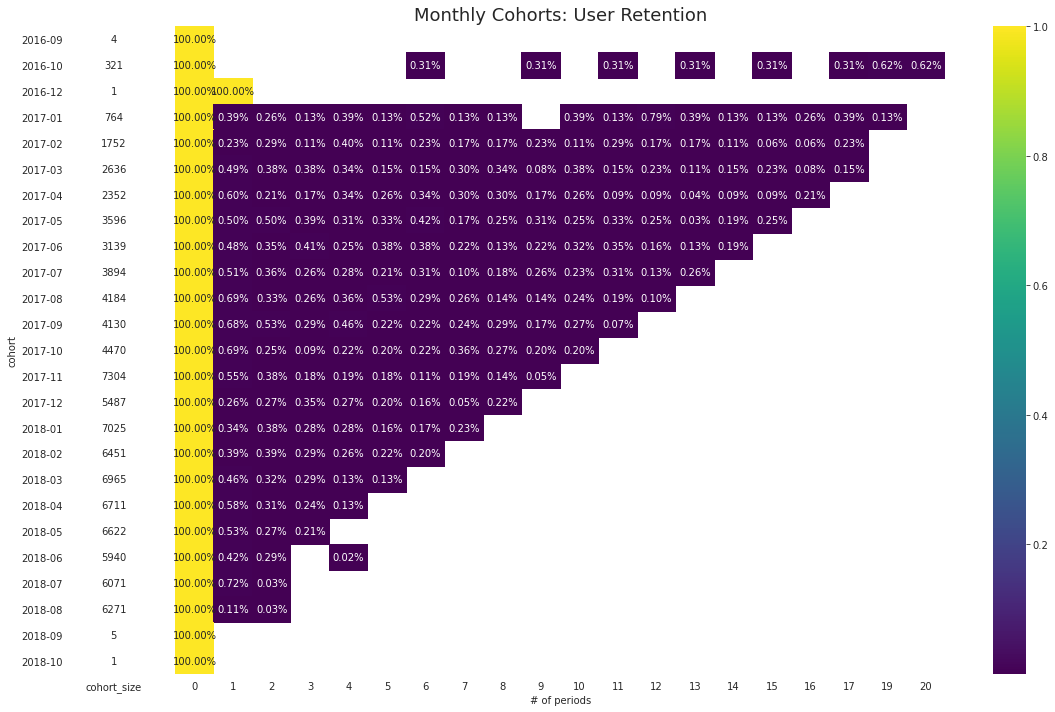

In [79]:

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(16, 10), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.2%', 
                cmap='viridis', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=18)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

In [80]:
# заключение. Начиная со 2-го месяца количество пользователей резко падает и в таком темпе удерживается во всех когортах 
# (1 месяц-1 когорта).
# в 2016 году - нет максимальной когорты. 
# в 2017 году максимальная когорта на 3ий месяц приходится на сентябрь 0,68%.
#  в 2018 году  - на март.

# 6. Построй RFM-кластеры для пользователей. Выведи для каждого кластера средние значения метрик R, F, M (и опиши подробно, как были построены метрики R, F, M). 

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import datetime as dt
import scipy.stats
import statsmodels.formula.api as sm

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [82]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import pandas as pd
from plotly.subplots import make_subplots

In [83]:
#обращаемся к исходному файлу
df_product.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,weekday,month,Year_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,Monday,10.0,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,Thursday,7.0,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,Wednesday,8.0,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,Saturday,11.0,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,Tuesday,2.0,2018-02


In [84]:
df_product.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'weekday', 'month',
       'Year_month'],
      dtype='object')

In [85]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   customer_id                    112650 non-null  object        
 2   order_status                   112650 non-null  object        
 3   order_purchase_timestamp       112650 non-null  datetime64[ns]
 4   order_approved_at              112635 non-null  datetime64[ns]
 5   order_delivered_carrier_date   111456 non-null  datetime64[ns]
 6   order_delivered_customer_date  110196 non-null  datetime64[ns]
 7   order_estimated_delivery_date  112650 non-null  datetime64[ns]
 8   customer_unique_id             112650 non-null  object        
 9   customer_zip_code_prefix       112650 non-null  int64         
 10  customer_city                  112650 non-null  object        
 11  

In [86]:
# проверяем количество пропущенных значений. будем работать со столбцами order_id, order_purchase_timestamp, price
df_product.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
weekday                            15
month                              15
Year_month                         15
dtype: int64

In [87]:
#проверка уникальных значений
df_product.nunique()

order_id                         98666
customer_id                      98666
order_status                         7
order_purchase_timestamp         98112
order_approved_at                90174
order_delivered_carrier_date     81017
order_delivered_customer_date    95664
order_estimated_delivery_date      450
customer_unique_id               95420
customer_zip_code_prefix         14976
customer_city                     4110
customer_state                      27
order_item_id                       21
product_id                       32951
seller_id                         3095
shipping_limit_date              93318
price                             5968
freight_value                     6999
weekday                              7
month                               12
Year_month                          24
dtype: int64

In [88]:

df_product['year']=df_product['order_purchase_timestamp'].dt.year
data=['seller_id','shipping_limit_date','weekday','month','Year_month']
df_product.drop(data,axis=1,inplace=True)


In [89]:
df_product

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,price,freight_value,year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,8.72,2017
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,2018
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,159.90,19.22,2018
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,2017
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90,20.10,2018
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1,b80910977a37536adeddd63663f916ad,205.99,65.02,2017
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,2018
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,2018


In [90]:
# проверка уникальных годов
df_product['year'].unique()

array([2017, 2018, 2016])

In [91]:
# проверка пропущенных значений
df_product.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                       0
product_id                          0
price                               0
freight_value                       0
year                                0
dtype: int64

In [93]:
# убираем строки с пропущенными значениями
df_product = df_product.dropna()

In [94]:
df_product.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_item_id                    0
product_id                       0
price                            0
freight_value                    0
year                             0
dtype: int64

In [95]:
# После проверки мы имеем:
#     -нет дубликатов
#     -нет пропущенных значений
#     -у нас есть 95420 customer_unique_id которых мы должны сегментировать

In [96]:
# RFM Анализ
# для РФМ анализа нам потребуются 4 колонки 'customer_unique_id', 'order_id', 'order_purchase_timestamp' and 'price'.

In [97]:
col =['customer_unique_id', 'order_id', 'order_purchase_timestamp', 'price']
RFM = df_product[col]
RFM.head()

,customer_unique_id,order_id,order_purchase_timestamp,price
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,29.99
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,118.70
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,159.90
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,45.00
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,19.90


In [98]:
RFM.shape

(110180, 4)

In [99]:
# При кластеризации RFM обычно предполагается, что учитываются только операции за последние 12 месяцев.Причина этого проста:
#     старые операции мало что могут сказать о текущем положении продавца, покупателя и самого товара. Для того, чтобы 
#     установить их, вам необходимо принять согласованную дату для группировки. В наших данных «сегодня» я буду считать 
#     день самой новой операции в наборе.

In [100]:
RFM['order_purchase_timestamp_1']=df_product['order_purchase_timestamp'].dt.strftime('%Y-%m-%d')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [101]:
RFM.drop(columns='order_purchase_timestamp', inplace=True)

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [102]:
RFM

,customer_unique_id,order_id,price,order_purchase_timestamp_1
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,29.99,2017-10-02
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,118.70,2018-07-24
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,159.90,2018-08-08
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,45.00,2017-11-18
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,19.90,2018-02-13
...,...,...,...,...
112645,da62f9e57a76d978d02ab5362c509660,63943bddc261676b46f01ca7ac2f7bd8,174.90,2018-02-06
112646,737520a9aad80b3fbbdad19b66b37b30,83c1379a015df1e13d02aae0204711ab,205.99,2017-08-27
112647,5097a5312c8b157bb7be58ae360ef43c,11c177c8e97725db2631073c19f07b62,179.99,2018-01-08
112648,5097a5312c8b157bb7be58ae360ef43c,11c177c8e97725db2631073c19f07b62,179.99,2018-01-08


In [103]:
RFM['order_purchase_timestamp_1'].max()

'2018-08-29'

In [104]:
RFM['order_purchase_timestamp_1'] = pd.to_datetime(RFM['order_purchase_timestamp_1'], errors='coerce')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [111]:
# приводим к типу datetime
now = dt.datetime(2018,9,3)

In [112]:
# Создаем rfm таблицу
# Расчет переменной «Recency» — информация о том, как давно покупатель совершал покупки в магазине:

In [113]:
rfm_df = RFM.groupby('customer_unique_id').agg({'order_purchase_timestamp_1': lambda x: (now - x.max()).days}) 

In [114]:
# «Частота» и «Денежная стоимость» делаю с помощью метода groupby:
rfm_df['Frequency'] = RFM.groupby(by=['customer_unique_id'])['order_id'].count()

In [115]:
rfm_df['MonetaryValue'] = RFM.groupby(by='customer_unique_id').agg({'price': 'sum'})

In [118]:
rfm_df.head()

,order_purchase_timestamp_1,Frequency,MonetaryValue
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
0000f46a3911fa3c0805444483337064,542,1,69.00
0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
0004aac84e0df4da2b147fca70cf8255,293,1,180.00


In [119]:
# переименуем столбец order_purchase_timestamp_1 на Recency
rfm_df.rename(columns={'order_purchase_timestamp_1': 'Recency'}, inplace=True)
rfm_df.head()

,Recency,Frequency,MonetaryValue
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
0000f46a3911fa3c0805444483337064,542,1,69.00
0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
0004aac84e0df4da2b147fca70cf8255,293,1,180.00


In [120]:
# Модель: необработанные расчетные переменные RFM + кластеризация K-средних
# В этом подходе мы использовали необработанные расчетные переменные RFM (Recency, Frequency, MonetaryValue) и кластеризацию K-средних.
# В наших данных присутствуют выбросы, поэтому мы должны применить нормализацию перед их моделированием.

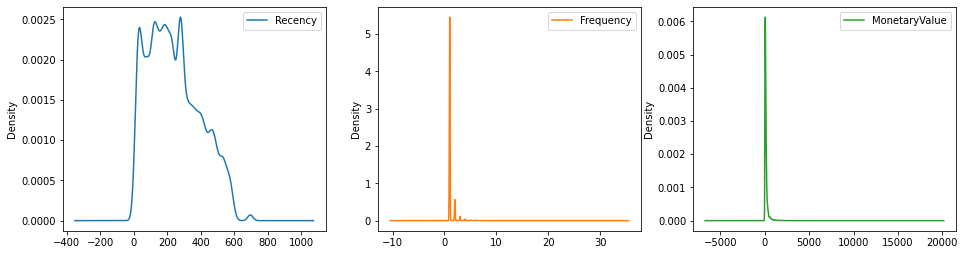

In [121]:
# Анализ данных таблицы RFM
# Давайте построим данные, чтобы получить больше информации:
plt.rcParams['figure.figsize'] = [16, 14]
rfm_df.plot(kind="density", subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



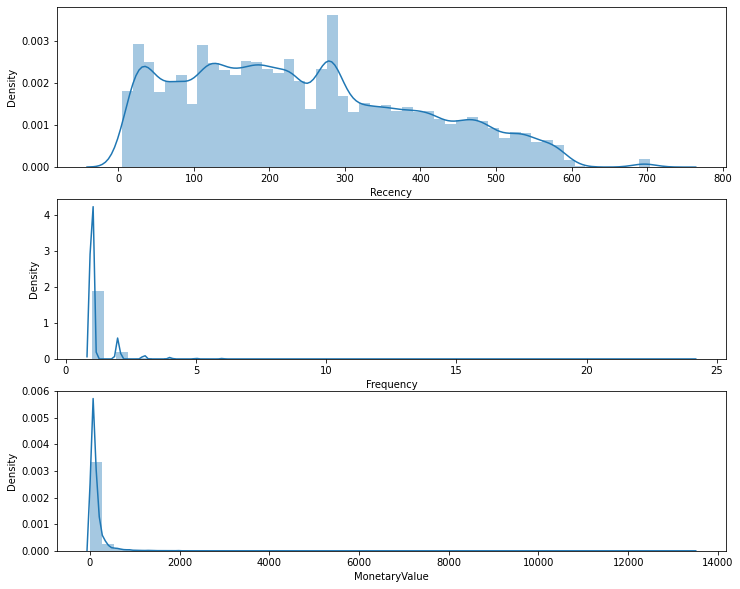

In [122]:
# Гистограммы переменных: Recency, Frequency, MonetaryValue:
plt.figure(figsize=(12,10))
# Recency variable distribution 
plt.subplot(3, 1, 1); sns.distplot(rfm_df['Recency'])
# Frequency variable distribution 
plt.subplot(3, 1, 2); sns.distplot(rfm_df['Frequency'])
# MonetaryValue variable distribution 
plt.subplot(3, 1, 3); sns.distplot(rfm_df['MonetaryValue'])

In [123]:
# На основе приведенных выше диаграмм видно, что переменные не имеют симметричного распределения. Переменные Frequency и 
# MonetarValue представляют собой асимметричные распределения. Кроме того, наблюдаются выбросы.

In [124]:
#проверка данных:
rfm_df.describe()

,Recency,Frequency,MonetaryValue
count,93342.000000,93342.000000,93342.000000
mean,242.464732,1.180390,141.619482
std,152.587826,0.620901,215.708238
min,5.000000,1.000000,0.850000
25%,119.000000,1.000000,47.650000
50%,223.000000,1.000000,89.700000
75%,351.000000,1.000000,154.690000
max,718.000000,24.000000,13440.000000


In [125]:
# Из приведенного выше анализа мы видим, что минимальное значение Recency для конкретного идентификатора клиента равно 0. 
# Таким образом, эта транзакция не имеет смысла и должна быть удалена.
# Мы также видим, что мы не получаем постоянных значений среднего и стандартного отклонения.
# Мы удаляем клиента со значением 0 из Recency:

In [126]:
rfm_df[rfm_df['Recency'] == 0]

,Recency,Frequency,MonetaryValue
customer_unique_id,,,


In [127]:
rfm_df = rfm_df[rfm_df['Recency'] > 0]
rfm_df.reset_index(drop=True,inplace=True)

In [128]:
raw_data = rfm_df[['Recency','Frequency','MonetaryValue']]

In [129]:
raw_data.describe()

,Recency,Frequency,MonetaryValue
count,93342.000000,93342.000000,93342.000000
mean,242.464732,1.180390,141.619482
std,152.587826,0.620901,215.708238
min,5.000000,1.000000,0.850000
25%,119.000000,1.000000,47.650000
50%,223.000000,1.000000,89.700000
75%,351.000000,1.000000,154.690000
max,718.000000,24.000000,13440.000000


In [130]:
# Теперь мы применяем логарифмическое преобразование к данным, а затем нормализуем их:

In [131]:
data_log = np.log(raw_data)

In [132]:
# Инициализируем стандартноый скаляр
scaler = StandardScaler()
scaler.fit(data_log)

data_sc = scaler.transform(data_log)

In [133]:
df_norm = pd.DataFrame(data_sc, columns=raw_data.columns)

In [134]:
df_norm.head()

,Recency,Frequency,MonetaryValue
0,-0.505924,-0.352564,0.424453
1,-0.477059,-0.352564,-1.630915
2,1.236911,-0.352564,-0.250139
3,0.662210,-0.352564,-1.291251
4,0.541560,-0.352564,0.772265


In [135]:
# Теперь проверяем асимметрию данных:

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



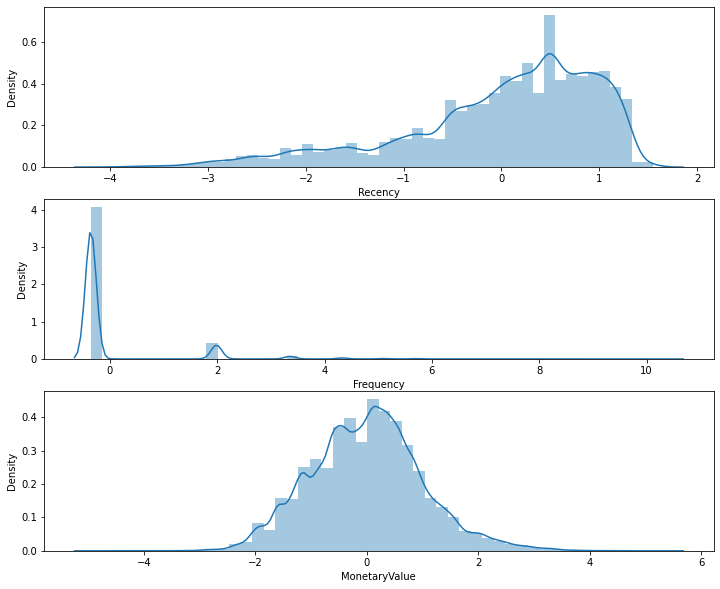

In [136]:
plt.figure(figsize=(12,10))
# Recency variable distribution 
plt.subplot(3, 1, 1); sns.distplot(df_norm['Recency'])
# Frequency variable distribution 
plt.subplot(3, 1, 2); sns.distplot(df_norm['Frequency'])
# MonetaryValue variable distribution 
plt.subplot(3, 1, 3); sns.distplot(df_norm['MonetaryValue'])

In [137]:
# K-means — это неконтролируемый алгоритм машинного обучения, который используется для кластеризации данных. В алгоритме 
# k-средних число кластеров K предопределено, и алгоритм итеративно присваивает каждую точку данных одному из кластеров 
# K на основе сходства признаков. Найдем оптимальное количество кластеров методом локтя:

In [138]:
group = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(df_norm)
    group.append([i, kmeans.inertia_])
groups = pd.DataFrame(group, columns = ['number of group', 'inertia'])

In [139]:
groups

,number of group,inertia
0,1,280026.000000
1,2,194177.953210
2,3,137918.140997
3,4,96957.214096
4,5,84595.053872
5,6,75037.907515
6,7,65657.342345
7,8,58815.219846
8,9,53545.439835
9,10,48455.950133


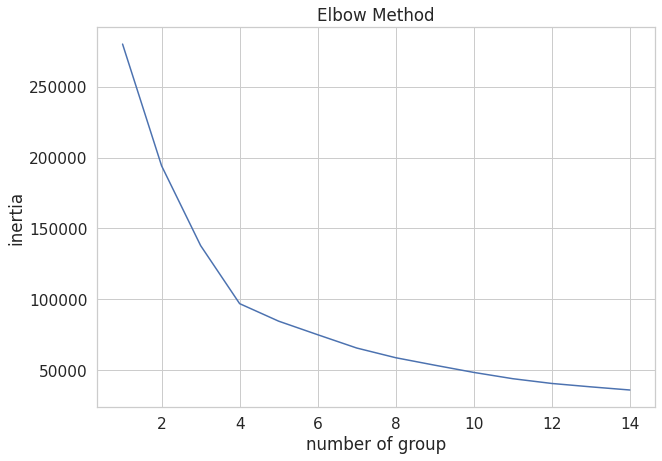

In [140]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4, style="whitegrid")
sns.lineplot(data = groups, x = 'number of group', y = 'inertia').set(title = "Elbow Method")
plt.show()

In [141]:
# Основываясь на графике локтя, мы можем выбрать 4 кластера. Функция визуализации группировки:

In [142]:
def plots_model():    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    for x in rfm_df.groups.unique():        
        xs = rfm_df[rfm_df.groups == x]['Recency']
        zs = rfm_df[rfm_df.groups == x]['Frequency']
        ys = rfm_df[rfm_df.groups == x]['MonetaryValue']
        ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w', label = x)

    ax.set_xlabel('Recency')
    ax.set_zlabel('Frequency')
    ax.set_ylabel('MonetaryValue')
    plt.title('Visualization of created groups')
    plt.legend()
    plt.show()

In [143]:
model = KMeans(n_clusters=4, init='k-means++', max_iter=300)
groups = model.fit_predict(df_norm)
df_norm['groups'] = groups
rfm_df['groups'] = groups

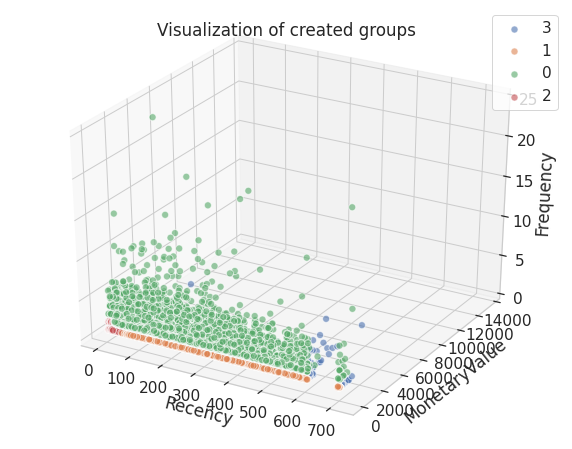

In [144]:
plots_model()

In [145]:
# добавление групп столбцов в DataFrame
rfm_df.head()

,Recency,Frequency,MonetaryValue,groups
0,116,1,129.90,3
1,119,1,18.90,1
2,542,1,69.00,1
3,326,1,25.99,1
4,293,1,180.00,3


In [146]:
# Распределение размера отдельных групп:
print((df_norm.groups.value_counts(normalize = True, sort = True) * 100).to_string())

1    35.817745
3    35.368859
2    16.749159
0    12.064237


In [147]:
# Статистика по всему набору:
rfm_df.agg(['mean'])

,Recency,Frequency,MonetaryValue,groups
mean,242.464732,1.18039,141.619482,1.754226


In [148]:
# Распределение размера отдельных групп:
rfm_df.groupby('groups').agg(['mean'])

,Recency,Frequency,MonetaryValue
,mean,mean,mean
groups,,,
0,245.543025,2.464346,220.687563
1,290.202465,1.000628,43.530158
2,47.702315,1.020916,111.919467
3,285.302175,1.000000,228.048414


# Описание результатов
В результате нашего анализа мы получили сегментацию на четыре группы. Мы можем интерпретировать их как следующие сегменты 
клиентов:
Группа 0: Клиенты, которые недавно совершали покупки, покупают часто и делают покупки на большие суммы.
Группа 1: Клиенты, которые относительно недавно совершали покупки, покупают  редко и делают покупки на малые суммы.
Группа 2: Клиенты, которые редко совершают покупки, покупают умеренно редко и совершают покупки на относительно малые суммы.
Группа 3: Покупатели, которые недавно совершали покупки, покупают редко и совершают покупки на большие суммы.
На основании полученных групп мы можем назвать их следующим образом:
Группа 0 - недавние лучшие клиенты - активные,
1 группа - новые и случайные клиенты - неактивные,
2 группа - старые и случайные клиенты - уходящие,
Группа 3 - лучшие клиенты - новые.